# Clase 03 Septiembre 2015

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

## Lectura de datos

In [12]:
data = pd.read_csv('regLin.csv')
data.head()


,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


## Train Test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data[['y']], test_size = 0.3)

print X_train.head()

             X
263  26.458060
20   97.317591
367  31.957632
342  21.634782
418  53.940511 Int64Index([ 263,   20,  367,  342,  418,  615,   18,  931,  660,  942, 
            ...
             548,  208,  772,  802,  484,  242,  752,  560, 1008,  270],
           dtype='int64', length=720)


## Estandarizamos los datos

In [47]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(y_train)
print X_scaler.mean_, X_scaler.std_
print Y_scaler.mean_, Y_scaler.std_

aux1 = X_scaler.transform(X_train)  
aux2 = Y_scaler.transform(y_train)

X_train_std = pd.DataFrame(aux1,index=X_train.index,columns=['X'])
Y_train_std = pd.DataFrame(aux2,index=y_train.index,columns=['y'])

print X_train_std.head()
print X_train.head()

[ 49.77657069] [ 28.74794997]
[ 32.8255248] [ 18.05628885]
            X
263 -0.811136
20   1.653719
367 -0.619833
342 -0.978915
418  0.144843
             X
263  26.458060
20   97.317591
367  31.957632
342  21.634782
418  53.940511


## Definimos las funciones a utilizar

Aquella que evalúa la función con las betas

In [32]:
def salida(b0,b1,x):
    return b0 + b1*x

Aquella que entrena el modelo

In [54]:

def entrena(X_train,y_train,etha,b0_inicial,b1_inicial):
    b0 = b0_inicial
    b1 = b1_inicial
    error=0
       
    for i in X_train.index:
        error = y_train.y[i]-salida(b0,b1,X_train.X[i])
        b0 = b0 + etha*error
        b1 = b1 + etha*error*X_train.X[i]
    return b0,b1
    



betas = entrena(X_train_std,Y_train_std,0.01,.1,.1)

print betas
   

(0.008906841279352512, 0.95171037516306145)


## Evaluamos X_train_std con las betas finales

In [59]:
y_hat = betas[0]+X_train_std*betas[1]

## Graficamos

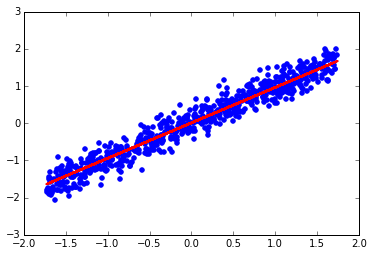

In [60]:
plt.scatter(X_train_std, Y_train_std, color = 'blue')
plt.plot(X_train_std, y_hat, color = 'red', linewidth = 2)
plt.show()